<a href="https://colab.research.google.com/github/rayane2907/Kalman-Filter/blob/main/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter

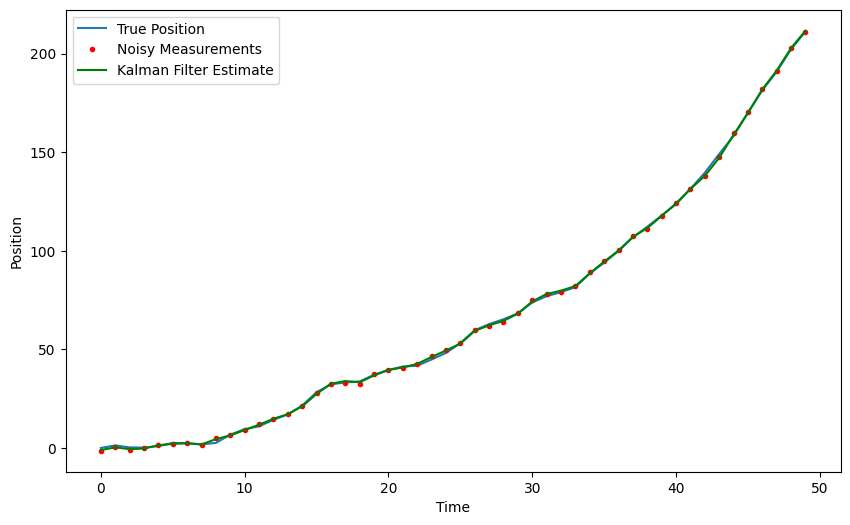

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial estimates
x = np.array([[0],    # Initial position
              [0]])   # Initial velocity
P = np.array([[1, 0],
              [0, 1]])

# State transition matrix
dt = 1  # Time step
A = np.array([[1, dt],
              [0, 1]])

# Control matrix
B = np.array([[0.5 * dt**2],
              [dt]])

# Control vector (acceleration)
u = np.array([[0]])

# Process noise covariance
Q = np.array([[1, 0],
              [0, 1]])

# Measurement matrix
H = np.array([[1, 0]])

# Measurement noise covariance
R = np.array([[1]])

# Number of iterations
n_iter = 50

# Placeholder for results
x_true = []
z = []
x_est = []

for i in range(n_iter):
    # Simulate the true position (noisy measurements)
    if i == 0:
        x_true.append(np.array([[0], [0]]))
    else:
        x_true.append(A @ x_true[-1] + B @ u + np.random.multivariate_normal([0, 0], Q).reshape(-1, 1))

    # Simulate measurements (with noise)
    z.append(H @ x_true[-1] + np.random.multivariate_normal([0], R).reshape(-1, 1))

    # Predict step
    x = A @ x + B @ u
    P = A @ P @ A.T + Q

    # Update step
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    x = x + K @ (z[-1] - H @ x)
    P = (np.eye(2) - K @ H) @ P

    # Store estimates
    x_est.append(x)

# Convert lists to arrays for plotting
x_true = np.array(x_true).squeeze()
z = np.array(z).squeeze()
x_est = np.array(x_est).squeeze()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_true[:, 0], label='True Position')
plt.plot(z, 'r.', label='Noisy Measurements')
plt.plot(x_est[:, 0], 'g-', label='Kalman Filter Estimate')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

# Extended Kalman Filter (EKF)
For the problem of measuring the water level in Tank T1 using two sensors: a sonar and a float.

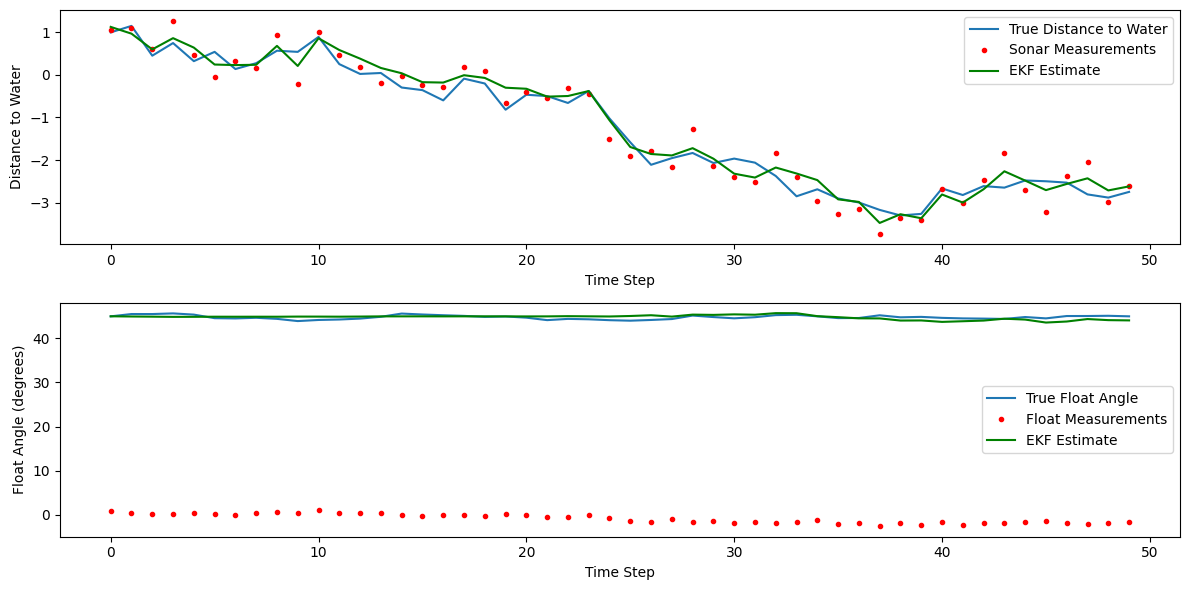

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initial state
x = np.array([[1], [45]])  # Initial water level distance and float angle (in degrees)
P = np.array([[1, 0], [0, 1]])  # Initial covariance matrix

# Process noise covariance
Q = np.array([[0.1, 0], [0, 0.1]])

# Measurement noise covariance
R = np.array([[0.1, 0], [0, 0.1]])

# Time step
dt = 1

# State transition function
def f(x):
    return x  # Assuming constant state (no dynamic model provided)

# State transition Jacobian
def F(x):
    return np.eye(2)  # Jacobian of the state transition function

# Measurement function
def h(x):
    d = x[0, 0]
    theta = x[1, 0]
    sonar_measurement = d
    float_measurement = d * np.sin(np.radians(theta))
    return np.array([[sonar_measurement], [float_measurement]])

# Measurement Jacobian
def H(x):
    d = x[0, 0]
    theta = x[1, 0]
    dH_d = np.array([[1, 0], [np.sin(np.radians(theta)), d * np.cos(np.radians(theta)) * np.pi / 180]])
    return dH_d

# Number of iterations
n_iter = 50

# Placeholder for results
x_true = []
z = []
x_est = []

for i in range(n_iter):
    # Simulate the true position (noisy measurements)
    if i == 0:
        x_true.append(np.array([[1], [45]]))
    else:
        x_true.append(f(x_true[-1]) + np.random.multivariate_normal([0, 0], Q).reshape(-1, 1))

    # Simulate measurements (with noise)
    z.append(h(x_true[-1]) + np.random.multivariate_normal([0, 0], R).reshape(-1, 1))

    # Predict step
    x = f(x)
    P = F(x) @ P @ F(x).T + Q

    # Update step
    K = P @ H(x).T @ np.linalg.inv(H(x) @ P @ H(x).T + R)
    x = x + K @ (z[-1] - h(x))
    P = (np.eye(2) - K @ H(x)) @ P

    # Store estimates
    x_est.append(x)

# Convert lists to arrays for plotting
x_true = np.array(x_true).squeeze()
z = np.array(z).squeeze()
x_est = np.array(x_est).squeeze()

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x_true[:, 0], label='True Distance to Water')
plt.plot(z[:, 0], 'r.', label='Sonar Measurements')
plt.plot(x_est[:, 0], 'g-', label='EKF Estimate')
plt.xlabel('Time Step')
plt.ylabel('Distance to Water')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x_true[:, 1], label='True Float Angle')
plt.plot(z[:, 1], 'r.', label='Float Measurements')
plt.plot(x_est[:, 1], 'g-', label='EKF Estimate')
plt.xlabel('Time Step')
plt.ylabel('Float Angle (degrees)')
plt.legend()

plt.tight_layout()
plt.show()